# Загрузка Pandas и очистка данных

In [526]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
import numpy as np
from datetime import datetime
import warnings
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [532]:
df = pd.read_csv('main_task.csv')

In [240]:
pd.set_option('display.max_columns', 500)

In [116]:
#посмотрим на информацию о данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
df.head()

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Все признаки записаны с заглавной буквы. Приведём названия признаков к другому формату записи. 

In [533]:
df.columns = [x.lower() for x in list(df.columns)]

In [6]:
df.head()

,restaurant_id,city,cuisine style,ranking,rating,price range,number of reviews,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Restaurant_id признако который не будем использовать для подачи на вход модели МО, но пока не будем его удалять, чтобы иметь возможность разделять рестораны.

# City

Обработку данных начнём с признака ***City***. Из информации об этом признаке видим что в нём нет пропусков. Первый делом посмотрим как распределён этот признако построив гисторамму, затем проверим все ли названия городов написаны правильно и в конце, так как это признак категориальный, создадим дополнительные колонки в нашем датасете, каждая из которых будет определять город и значениями будет 0 и 1.

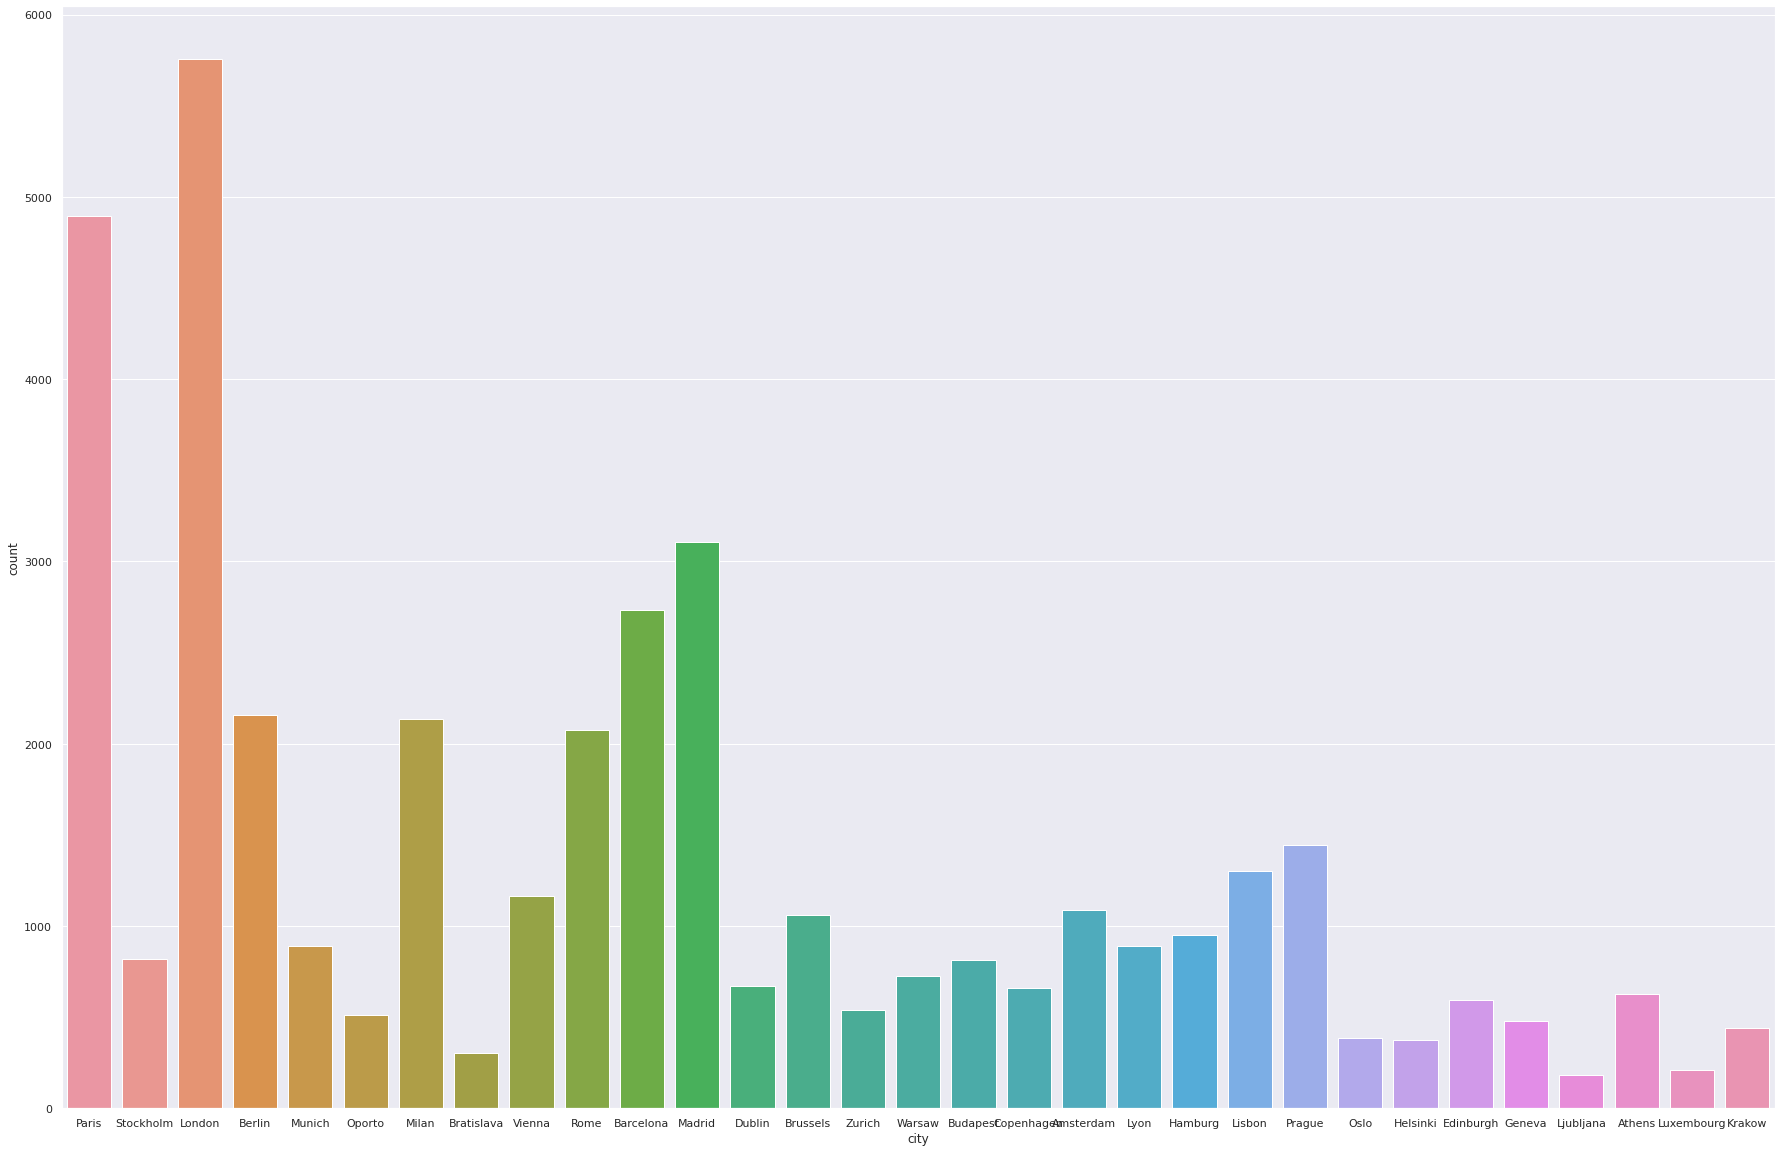

In [8]:
sns.set(rc={'figure.figsize':(30.7,20.27)})
sns.countplot('city', data=df)

In [9]:
df.city.value_counts()

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

Видим что в данном признаке присутствуют города которые представляют собой малое количество записей, но так как уникальных городов не много оставим их все и преобразуем признак city в dummy-переменные. 

In [534]:
df = pd.concat([df, pd.get_dummies(df.city)], axis=1)

# Cuisine Style

Теперь рассмотрим признак ***cuisine style***. Видим что данные представлены в виде списков в каждой ячейке этого признака, а так же есть пропуски в этих значениях. Первым делом изменим тип данных в данной ячейке так чтобы каждое слово в ячейке было отдельным, для удобства.

In [535]:
# Посчитаем количество пропусков
df['cuisine style'].isna().sum()

9283

In [536]:
# сохраним эту информацию
df['nan_cuisine_style'] = pd.isna(df['cuisine style']).astype('float64') 

Попробуем заполнить пропуски взяв комментарии пользователей

Для начала обработаем комментарии (reviews)так чтобы все они были написаны строчными буквами.

In [537]:
def change_reviews(reviews):
    reviews = reviews.split("'")[-2::-2]
    new_reviews = []
    for i in reviews:
        if not pd.isna(i):
            new_reviews.append(i.lower())
    if len(new_reviews) == 0:
        return 'a'
    return new_reviews[::-1]

In [538]:
#создадим новую колонку с изменёнными значениями
df['lower_case_reviews'] = df['reviews'].apply(change_reviews)

In [539]:
# пропущенные значениями заполним словом 'other'
df['cuisine style'].fillna("['other']", inplace=True)
#выделяем данные с пропущенными значениями в cuisine style
unknowen_cuisine_style = df[df['cuisine style'] == "['other']"]
#смотрим на ревью в каждой строке и сравниваем есть ли совпадения по тем уникальным кухням которые нам уже удалось найти
for index, row in unknowen_cuisine_style.iterrows():
    for review in row.lower_case_reviews:
        found_styles = []
        for cuisine_style in uniq_cuisine:
            if cuisine_style in review:
                found_styles.append(cuisine_style)
        if len(found_styles) > 0:
            df.at[index, 'cuisine style'] = "['{}']".format(found_styles[0].title()) 
        if len(found_styles) > 1:
            df.at[index, 'cuisine style'] = "['{}','{}']".format(found_styles[0].title(), found_styles[1].title()) 

In [540]:
unknowen_cuisine_style = df[df['cuisine style'] == "['other']"]
print(len(unknowen_cuisine_style))

7963


Нам удалось избавиться от 1320 пропусков

In [541]:
# проведем обработку значений переменной
df['cuisine style'] = df['cuisine style'].str.findall(r"'(\b.*?\b)'") 

temp_list = df['cuisine style'].tolist()

def list_unrar(list_of_lists):
    result=[]
    for lst in list_of_lists:
        result.extend(lst)
    return result

temp_counter=Counter(list_unrar(temp_list))
temp_counter

Counter({'European': 10067,
         'French': 3223,
         'International': 1586,
         'other': 7963,
         'Japanese': 1485,
         'Sushi': 1199,
         'Asian': 3027,
         'Grill': 507,
         'Vegetarian Friendly': 11189,
         'Vegan Options': 4486,
         'Gluten Free Options': 4113,
         'German': 687,
         'Central European': 1393,
         'Bar': 3553,
         'Italian': 6057,
         'Pizza': 3003,
         'Fast Food': 1742,
         'Mediterranean': 6280,
         'Spanish': 2812,
         'Healthy': 653,
         'Cafe': 2505,
         'Thai': 771,
         'Vietnamese': 526,
         'Pub': 2513,
         'Chinese': 1198,
         'British': 1597,
         'Polish': 377,
         'Fusion': 583,
         'Dutch': 297,
         'Mexican': 456,
         'Venezuelan': 43,
         'South American': 374,
         'Soups': 499,
         'Belgian': 274,
         'Steakhouse': 575,
         'Latin': 305,
         'Barbecue': 556,
         'Argen

In [542]:
# сформируем список уникальных кухонь и сформируем на его основе новый признак
list_of_unique_Cuisine = [x[0] for x in temp_counter.most_common()[-17:]]
df['unique_Cuisine_Style'] = df['cuisine style'].apply(lambda x: 1 if len(set(x) & set(list_of_unique_Cuisine))>0  else 0).astype('float64')


In [543]:
for cuisine in temp_counter:
    df[cuisine] = df['cuisine style'].apply(lambda x: 1 if cuisine in x else 0 ).astype('float64')

# генерируем новый признак кол-во кухонь в ресторане
df['count_cuisine_style'] = df['cuisine style'].apply(lambda x: len(x)).astype('float64')

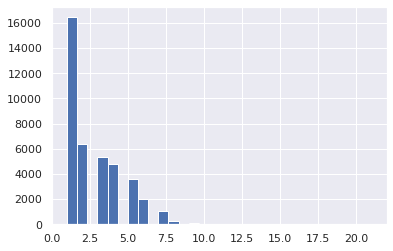

In [544]:
df['count_cuisine_style'].hist(bins=30)

Видим что в значениях есть нули, это значит что это не Other, а просто не заполненные значения. Оставим всё как есть так как в ресторане должен быть как минимум один тип кухни

# Price Range

In [545]:
#Посмотрим какими уникальными данными обладает этот признак
df['price range'].unique()

array(['$$ - $$$', nan, '$$$$', '$'], dtype=object)

Не совсем понятные глазу занчения признака. Изменим их на категории в виде чисел где: 

In [415]:
# nan - 'nan'(str), $ - 1, $$ - $$$ - 2, $$$$ - 3.

In [546]:
def change_price_range(price_range):
    if price_range == '$':
        return 1
    elif price_range == '$$ - $$$':
        return 2
    elif price_range == '$$$$':
        return 3
    elif pd.isna(price_range):
        return 'nan'

In [547]:
df['price range'] = df['price range'].apply(change_price_range)

In [548]:
df[df['price range'] != 'nan']['price range'].value_counts()

2    18412
1     6279
3     1423
Name: price range, dtype: int64

Видим что самое часто встречающееся значение это 2. Заполним пропуски самым часто встречающимся значением.

In [549]:
price_range_nan_index = df[df['price range'] == 'nan'].index
for index in price_range_nan_index:
    df.at[index, 'price range'] = 1

In [550]:
df['price range'].unique()

array([2, 1, 3], dtype=object)

Заполнив все пропуски мы можем представить это признак в виде dummy-переменной, так как этот признак категориальный.

In [551]:
df = pd.concat([df, pd.get_dummies(df['price range'])], axis=1)

# Number of Reviews

Последний признак с пропущенными значениями ***number of reviews***. Посмотрим на содержимое и постараемся заполнить пропуски.

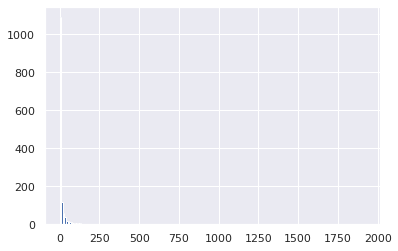

In [449]:
df['number of reviews'].value_counts().hist(bins=200)

Посморим на количество пропусков

In [552]:
df['number of reviews'].isna().sum()

2543

Построим boxplot и посмотрим есть ли выбросы

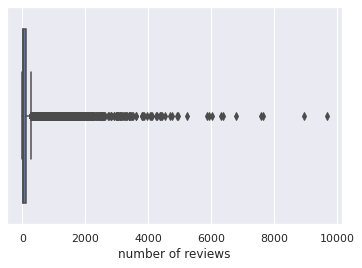

In [553]:
sns.boxplot(df['number of reviews'])

Видим что есть выбросы, попробуем найти их использую квартили и z-score

In [554]:
# IQR
o = outliers_iqr(df['number of reviews'])
o

array([], dtype=int64)

Анализ квартилей показал что выбросов нет, посмотрим на z-score

In [555]:
# Z-score
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    o = outliers_z_score(df['number of reviews'], threshold=10)
len(o)

50

In [556]:
df.loc[o]['number of reviews'].min()

3101.0

Значение threshold=10 было подобрано экспериментально, чтобы найти более точные значения выбросов. Удалим эти значения их датасета.

In [557]:
df = df[df['number of reviews'] < 3101]

In [558]:
df.reset_index(inplace=True)

Неизвестные значения заполним средним арифметическим

In [559]:
df['number of reviews'].mean()

119.00147031304301

In [560]:
df['number of reviews'].fillna(round(df_copy['number of reviews'].mean()), inplace=True)

# Reviews

In [561]:
# в ревью нет пропусков, но 4874 строки со значением [[], []]. По сути это пустые строки сохраним их 
df['empty_Reviews'] = (df['reviews']=='[[], []]').astype('float64')

In [562]:
# вытащим дату из ревью и создадим новые критерии
df['date_of_review'] = df['reviews'].str.findall('\d+/\d+/\d+')
df['len_date'] = df['date_of_review'].apply(lambda x: len(x))

# проверим длину дат, на случай если там больше или меньше двух
df[df.len_date == 3]

,index,restaurant_id,city,cuisine style,ranking,rating,price range,number of reviews,reviews,url_ta,id_ta,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,nan_cuisine_style,lower_case_reviews,unique_Cuisine_Style,European,French,International,other,Japanese,Sushi,Asian,Grill,Vegetarian Friendly,Vegan Options,Gluten Free Options,German,Central European,Bar,Italian,Pizza,Fast Food,Mediterranean,Spanish,Healthy,Cafe,Thai,Vietnamese,Pub,Chinese,British,Polish,Fusion,Dutch,Mexican,Venezuelan,South American,Soups,Belgian,Steakhouse,Latin,Barbecue,Argentinean,Irish,Seafood,Swiss,Portuguese,Contemporary,Wine Bar,Greek,Central American,Indian,Middle Eastern,Turkish,Hungarian,Pakistani,Peruvian,Delicatessen,Eastern European,Swedish,Scandinavian,Tibetan,Nepali,Korean,Southwestern,Czech,American,Slovenian,Balti,Street Food,Diner,Brew Pub,Caribbean,Austrian,Moroccan,Halal,Lebanese,Russian,African,Ethiopian,Egyptian,Danish,Brazilian,Ecuadorean,Israeli,Kosher,Gastropub,Australian,Singaporean,Malaysian,Minority Chinese,Scottish,Arabic,Ukrainian,Chilean,Mongolian,Cuban,Persian,Indonesian,Colombian,Jamaican,Norwegian,Hawaiian,Armenian,Taiwanese,Bangladeshi,Sri Lankan,Cambodian,Albanian,New Zealand,Croatian,Filipino,Central Asian,Tunisian,Cajun & Creole,Romanian,Georgian,Polynesian,Azerbaijani,Caucasian,Afghani,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian,count_cuisine_style,1,2,3,empty_Reviews,date_of_review,len_date
8637,9254,id_12965,London,"[Cafe, French]",12975.0,3.5,2,31.0,"[['The desserts arcade !', 'Visit today 3/1/20...",/Restaurant_Review-g186338-d1017372-Reviews-Ma...,d1017372,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,"[the desserts arcade !, visit today 3/1/2017, ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0.0,"[3/1/2017, 06/02/2017, 01/03/2017]",3
21815,23348,id_450,Geneva,"[French, European]",453.0,4.0,2,48.0,"[['lunch 29/9/2016', 'Unplanned Great Dinner']...",/Restaurant_Review-g188057-d2706773-Reviews-Le...,d2706773,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,"[lunch 29/9/2016, unplanned great dinner, 09/3...",0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1,0,0.0,"[29/9/2016, 09/30/2016, 08/25/2016]",3


In [563]:
# есть значение 3 надо разобраться что там
print("кол-во значений Reviews с тремя датами :=" , len(df[df['len_date']==3]))
print("значения Reviews с тремя датами :=")
temp_list = df[df['len_date']==3].reviews.to_list()
display(df[df['len_date']==3].reviews.to_list())
display([re.findall('\d+/\d+/\d+', x) for x in temp_list])

кол-во значений Reviews с тремя датами := 2
значения Reviews с тремя датами :=


["[['The desserts arcade !', 'Visit today 3/1/2017'], ['06/02/2017', '01/03/2017']]",
 "[['lunch 29/9/2016', 'Unplanned Great Dinner'], ['09/30/2016', '08/25/2016']]"]

[['3/1/2017', '06/02/2017', '01/03/2017'],
 ['29/9/2016', '09/30/2016', '08/25/2016']]

In [564]:
# видим что люди указывали даты в отзывах и эти даты попали в ячейки обработанных значений
# из-за этого возникнут ошибки так как даты не верные и их формат отличается от формата выгрузки
# при этом таких строк всего две, но постараемся не выбрасывать эти значения и исправим их

df['len_date'].date_of_review = df[df['len_date']==3].date_of_review.apply(lambda x: x.pop(0))
df.len_date.loc[df[df.len_date == 3].index] = 2

/usr/lib/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [565]:
# также есть значение 1 надо разобраться что там
print("кол-во значений Reviews с одной датой :=" , len(df[df['len_date']==1]))
display(df[df['len_date']==1].reviews[:4])

кол-во значений Reviews с одной датой := 3610


15    [['This is a real hidden Sushi-gem'], ['04/12/...
24    [['Heavenly meat slices and craft beer too.'],...
25    [['Good value canteen lunch stop.'], ['01/26/2...
26                       [['Fab Food'], ['08/20/2011']]
Name: reviews, dtype: object

In [566]:
# оказалось, что есть отзывы с одним отзывом и их достаточно много 3610
# сохраним это на всякий случай, чтобы не потерять
df['one_Review'] = (df['len_date']==1).astype('float64')

# заполним перерыв между отзывами (по отзывам где len = 2) и насколько давно был сделан последний самый свежий отзыв
# создадим для этого функции:
def time_to_now(row):
    if row['date_of_review'] == []:
        return None
    return pd.datetime.now() - pd.to_datetime(row['date_of_review']).max()

def time_between_Reviews(row):
    if row['date_of_review'] == []:
        return None
    return pd.to_datetime(row['date_of_review']).max() - pd.to_datetime(row['date_of_review']).min()

df['day_to_now'] = df.apply(time_to_now, axis = 1).dt.days
df['day_between_reviews'] = df[df['len_date']==2].apply(time_between_Reviews, axis = 1).dt.days

Посмотрим на критерий day_to_now построив гистограмму и boxplot 

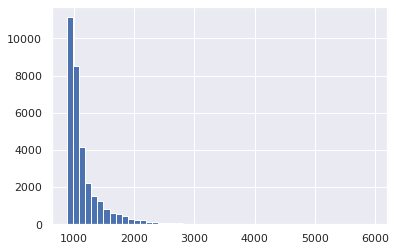

In [567]:
df['day_to_now'].hist(bins=50)

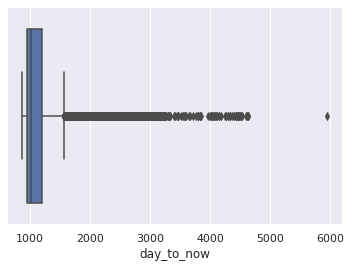

In [491]:
sns.boxplot(df['day_to_now'])

Пропусков в тренировочном датасете нет. Но есть 4874 незаполненных строк с отзывами в тренировочном датасете. В 3610 строках есть только один отзыв, хотя в подавляющем большинстве отзывов два. Удалять пока ничего не будем и при необходимости обратим внимание на этот признак после построения модели и её тренировки.

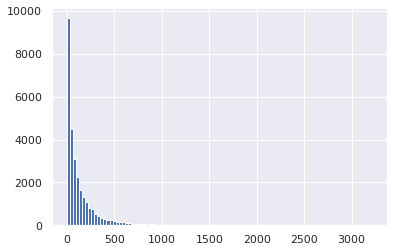

In [494]:
# теперь посмотрим на разницу в датах отзывов в днях 
df['day_between_reviews'].hist(bins=100)

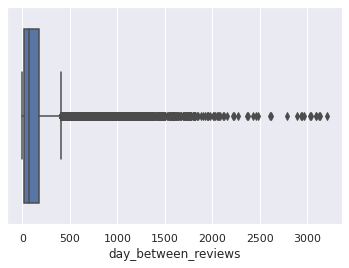

In [495]:
sns.boxplot(df['day_between_reviews'])

Применим квартильный анализ и посмотрим на выбросы и их пороги

In [568]:
o = outliers_iqr(df['day_between_reviews'])
len(o)

0

Квартильный анализ ничего не показал, применим z-score анализ

In [569]:
o = outliers_z_score(df['day_between_reviews'])
len(o)

604

Значений определённых как выбросы не так уж и много, но не будем их удалять и при необходимости вернёмся к этому признаку после построения модели и определения значимости признаков

In [570]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

def outliers_z_score(ys, threshold=3):
    mean_y = np.mean(ys)
    std_y = np.std(ys)
    z_scores = [(y - mean_y) / std_y for y in ys]
    return np.where(np.abs(z_scores) > threshold)[0]

# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [581]:
df

,ranking,rating,number of reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,nan_cuisine_style,unique_Cuisine_Style,European,French,International,other,Japanese,Sushi,Asian,Grill,Vegetarian Friendly,Vegan Options,Gluten Free Options,German,Central European,Bar,Italian,Pizza,Fast Food,Mediterranean,Spanish,Healthy,Cafe,Thai,Vietnamese,Pub,Chinese,British,Polish,Fusion,Dutch,Mexican,Venezuelan,South American,Soups,Belgian,Steakhouse,Latin,Barbecue,Argentinean,Irish,Seafood,Swiss,Portuguese,Contemporary,Wine Bar,Greek,Central American,Indian,Middle Eastern,Turkish,Hungarian,Pakistani,Peruvian,Delicatessen,Eastern European,Swedish,Scandinavian,Tibetan,Nepali,Korean,Southwestern,Czech,American,Slovenian,Balti,Street Food,Diner,Brew Pub,Caribbean,Austrian,Moroccan,Halal,Lebanese,Russian,African,Ethiopian,Egyptian,Danish,Brazilian,Ecuadorean,Israeli,Kosher,Gastropub,Australian,Singaporean,Malaysian,Minority Chinese,Scottish,Arabic,Ukrainian,Chilean,Mongolian,Cuban,Persian,Indonesian,Colombian,Jamaican,Norwegian,Hawaiian,Armenian,Taiwanese,Bangladeshi,Sri Lankan,Cambodian,Albanian,New Zealand,Croatian,Filipino,Central Asian,Tunisian,Cajun & Creole,Romanian,Georgian,Polynesian,Azerbaijani,Caucasian,Afghani,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian,count_cuisine_style,1,2,3,empty_Reviews,day_to_now,day_between_reviews
0,0.539409,3.5,0.308674,-0.168605,-0.126263,-0.270018,-0.234576,-0.083337,-0.164708,-0.142746,-0.130141,-0.131725,-0.125276,-0.109849,-0.154582,-0.097465,-0.105918,-0.183146,-0.067167,-0.410614,-0.072762,-0.152576,-0.29044,-0.239420,-0.150360,-0.113529,-0.099403,2.647329,-0.188154,-0.238358,-0.143815,-0.171187,-0.133188,-0.116982,-0.518509,-0.037668,1.676897,3.319094,4.872379,-0.467237,-0.201533,-0.179766,-0.293352,-0.114132,-0.650985,-0.367644,-0.349987,-0.134121,-0.195347,-0.320220,-0.431559,-0.291413,-0.215833,-0.444435,-0.279472,-0.128861,-0.260726,-0.142649,-0.117451,-0.26329,-0.177455,-0.20875,-0.097325,-0.123615,-0.088084,-0.108847,-0.033527,-0.096904,-0.113891,-0.084788,-0.122944,-0.089915,-0.120912,-0.065951,-0.087155,-0.203535,-0.067966,-0.173162,-0.116747,-0.137288,-0.126482,-0.059734,-0.168856,-0.143427,-0.108847,-0.094917,-0.056254,-0.048836,-0.100901,-0.114492,-0.068164,-0.095631,-0.025338,-0.046295,-0.068164,-0.021941,-0.122496,-0.187620,-0.041399,-0.046871,-0.082355,-0.08653,-0.076916,-0.048003,-0.09954,-0.061292,-0.127568,-0.093181,-0.039065,-0.063025,-0.034317,-0.022543,-0.068755,-0.056967,-0.007312,-0.043299,-0.036949,-0.111703,-0.024804,-0.021941,-0.028799,-0.017151,-0.066359,-0.035469,-0.020029,-0.014626,-0.019349,-0.025338,-0.038373,-0.038721,-0.024258,-0.025338,-0.044521,-0.023129,-0.016352,-0.0237,-0.044219,-0.025861,-0.023129,-0.012666,-0.012666,-0.027369,-0.019349,-0.017914,-0.022543,-0.023129,-0.015513,-0.021323,-0.007312,-0.007312,-0.010341,-0.0237,-0.011562,-0.00517,-0.00517,-0.010341,-0.011562,-0.00517,-0.00517,-0.007312,-0.007312,-0.00517,0.161548,-0.956028,1.029438,-0.195936,-0.387062,-0.641728,-0.456201
1,-0.558884,4.0,-0.448621,-0.168605,-0.126263,-0.270018,-0.234576,-0.083337,-0.164708,-0.142746,-0.130141,-0.131725,-0.125276,-0.109849,-0.154582,-0.097465,-0.105918,-0.183146,-0.067167,-0.410614,-0.072762,-0.152576,-0.29044,-0.239420,-0.150360,-0.113529,-0.099403,-0.377739,-0.188154,-0.238358,6.953388,-0.171187,-0.133188,-0.116982,1.928608,-0.037668,-0.596339,-0.301287,-0.205239,2.140242,-0.201533,-0.179766,-0.293352,-0.114132,-0.650985,-0.367644,-0.349987,-0.134121,-0.195347,-0.320220,-0.431559,-0.291413,-0.215833,-0.444435,-0.279472,-0.128861,-0.260726,-0.142649,-0.117451,-0.26329,-0.177455,-0.20875,-0.097325,-0.123615,-0.088084,-0.108847,-0.033527,-0.096904,-0.113891,-0.084788,-0.122944,-0.089915,-0.120912,-0.065951,-0.087155,-0.203535,-0.067966,-

In [575]:
# Удаление не числовых критериев
df.drop(['restaurant_id', 'city', 'cuisine style',
             'price range', 'reviews', 'url_ta', 'id_ta', 
             'lower_case_reviews',
#              'empty_Reviews',
             'date_of_review',
             'len_date',
             'one_Review'], axis = 1, inplace=True, errors='ignore')

In [522]:
# стандартизируем и заполняем нулями пропуски по всем переменным

In [576]:
# функция для стандартизации
def StandardScaler_column(d_col):
    scaler = StandardScaler()
    scaler.fit(df[[d_col]])
    return scaler.transform(df[[d_col]])

In [1]:
# стандартизируем все столбцы кроме целевой и Sample
for i  in list(df.columns):
    if i != 'rating':
        df[i] = StandardScaler_column(i)
        if len(df[df[i].isna()]) < len(df):
            df[i] = df[i].fillna(0)

NameError: name 'df' is not defined

In [578]:
# проверяем заполнение
display(df.describe().head(1))

,ranking,rating,number of reviews,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,Geneva,Hamburg,Helsinki,Krakow,Lisbon,Ljubljana,London,Luxembourg,Lyon,Madrid,Milan,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,nan_cuisine_style,unique_Cuisine_Style,European,French,International,other,Japanese,Sushi,Asian,Grill,Vegetarian Friendly,Vegan Options,Gluten Free Options,German,Central European,Bar,Italian,Pizza,Fast Food,Mediterranean,Spanish,Healthy,Cafe,Thai,Vietnamese,Pub,Chinese,British,Polish,Fusion,Dutch,Mexican,Venezuelan,South American,Soups,Belgian,Steakhouse,Latin,Barbecue,Argentinean,Irish,Seafood,Swiss,Portuguese,Contemporary,Wine Bar,Greek,Central American,Indian,Middle Eastern,Turkish,Hungarian,Pakistani,Peruvian,Delicatessen,Eastern European,Swedish,Scandinavian,Tibetan,Nepali,Korean,Southwestern,Czech,American,Slovenian,Balti,Street Food,Diner,Brew Pub,Caribbean,Austrian,Moroccan,Halal,Lebanese,Russian,African,Ethiopian,Egyptian,Danish,Brazilian,Ecuadorean,Israeli,Kosher,Gastropub,Australian,Singaporean,Malaysian,Minority Chinese,Scottish,Arabic,Ukrainian,Chilean,Mongolian,Cuban,Persian,Indonesian,Colombian,Jamaican,Norwegian,Hawaiian,Armenian,Taiwanese,Bangladeshi,Sri Lankan,Cambodian,Albanian,New Zealand,Croatian,Filipino,Central Asian,Tunisian,Cajun & Creole,Romanian,Georgian,Polynesian,Azerbaijani,Caucasian,Afghani,Uzbek,Salvadoran,Yunnan,Native American,Canadian,Xinjiang,Burmese,Fujian,Welsh,Latvian,count_cuisine_style,1,2,3,empty_Reviews,day_to_now,day_between_reviews
count,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0,37407.0


In [582]:
# разбиваем датасет на целевую перменную и тренировочные данные
X = df.drop(columns='rating')
y = df['rating']

In [583]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [584]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# Создаём, обучаем и тестируем модель

In [517]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [585]:
# Создаём модель
regr =  RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=42)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


In [587]:
def classic_round(d_num):
    return int(d_num + (0.5 if d_num > 0 else -0.5))

def my_round(d_pred):
    result = classic_round(d_pred*2)/2
    if result <=5:
        return result
    else:
        return 5

my_vec_round = np.vectorize(my_round)

In [589]:
y_pred = my_vec_round(y_pred)

In [590]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', MAE)

MAE: 0.18236740804106075


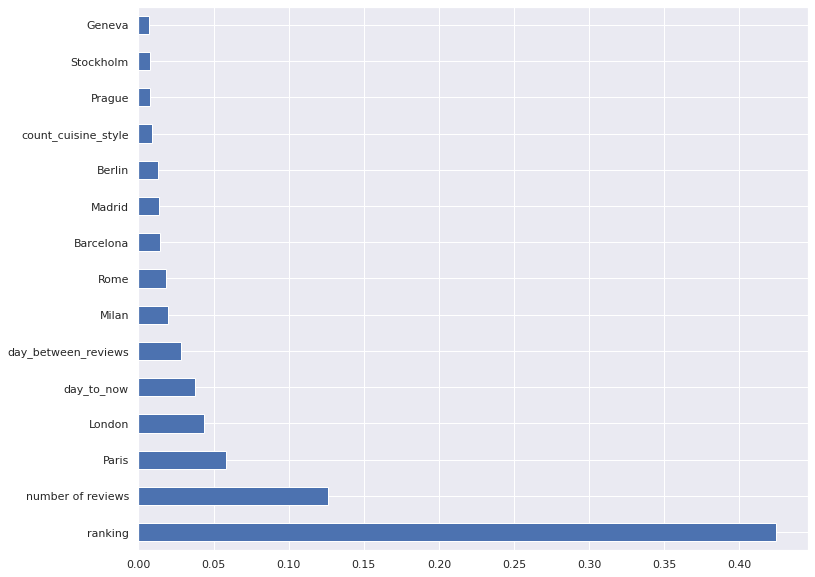

In [592]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (12,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

### Проверяем корреляцию важных переменных

(15.5, -0.5)

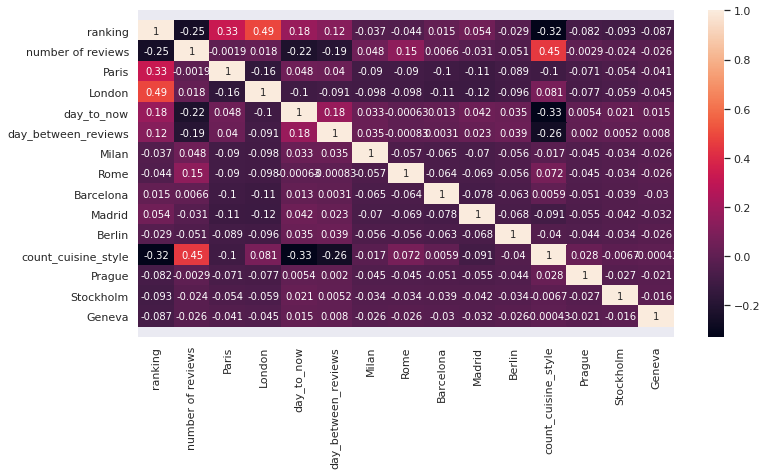

In [595]:
df_temp = df[list(feat_importances.nlargest(15).index[0:15])]
plt.rcParams['figure.figsize'] = (12,6)
ax = sns.heatmap(df_temp.corr(), annot=True, fmt='.2g')
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5)